  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST_data\MNIST\raw\train-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST_data\MNIST\raw\train-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST_data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./MNIST_data\MNIST\raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST_data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./MNIST_data\MNIST\raw

Processing...


C:\Users\kimta\.conda\envs\NEW_env\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
label(number): 5


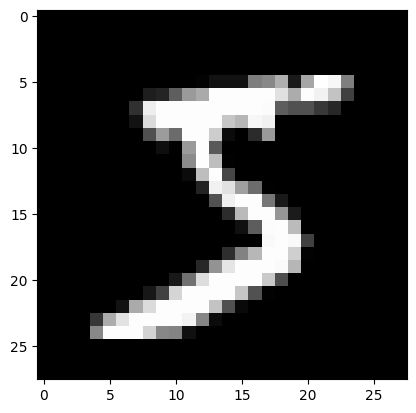

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

mnist_train = dataset.MNIST(root='./MNIST_data', train=True,
                            transform=transforms.ToTensor(), download=True)

mnist_test = dataset.MNIST(root='./MNIST_data', train=False,
                           transform=transforms.ToTensor(), download=True)

#sample
img, label = mnist_train[0]
plt.imshow(img[0,:,:],cmap='gray')
print(f'label(number): {label}')

Epoch: 1
 Iteration:0 Train loss 2.302
 Iteration:600 Train loss 1.634
 Iteration:1200 Train loss 1.588
 Iteration:1800 Train loss 1.569
Epoch: 2
 Iteration:0 Train loss 1.538
 Iteration:600 Train loss 1.518
 Iteration:1200 Train loss 1.514
 Iteration:1800 Train loss 1.512
Epoch: 3
 Iteration:0 Train loss 1.556
 Iteration:600 Train loss 1.502
 Iteration:1200 Train loss 1.500
 Iteration:1800 Train loss 1.499
Test loss 1.499363, Accuracy: 96.475637%
Test 1
True number: 8
Predict number: tensor([8])
Test 2
True number: 5
Predict number: tensor([4])
Test 3
True number: 3
Predict number: tensor([3])
Test 4
True number: 7
Predict number: tensor([7])
Test 5
True number: 0
Predict number: tensor([0])


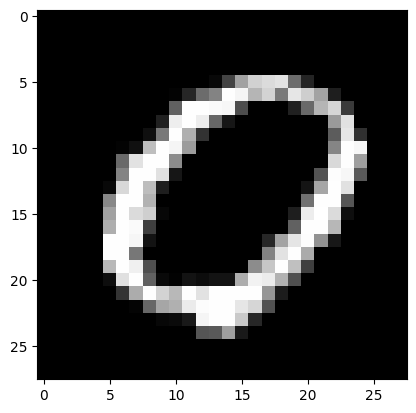

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as dataset
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

mnist_train = dataset.MNIST(root='./MNIST_data', train=True,
                            transform=transforms.ToTensor(), download=True)

mnist_test = dataset.MNIST(root='./MNIST_data', train=False,
                           transform=transforms.ToTensor(), download=True)

train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=32,shuffle=True,drop_last=False)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=32,shuffle=False,drop_last=False)

class MNIST_full(nn.Module):
    def __init__(self):
        super(MNIST_full, self).__init__()
        self.lin1 = nn.Linear(784,256)
        self.lin2 = nn.Linear(256,128)
        self.lin3 = nn.Linear(128,10)

    def forward(self,x):
        x = x.view(-1, 784)
        x = F.relu(self.lin1(x))
        x = F.relu(self.lin2(x))
        x = F.softmax(self.lin3(x), dim=1)
        return x

model = MNIST_full()
optimizer = optim.Adam(model.parameters(),lr=0.001)

criterion = nn.CrossEntropyLoss()

for epoch in range(3):
    print(f'Epoch: {epoch+1}')
    loss_buffer = []
    for idx, (x,y) in enumerate(train_loader):
        y_onehot = torch.zeros((y.shape[0],10))
        y_onehot[range(y.shape[0]),y]=1
        y_infer = model(x)
        loss = criterion(y_infer,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_buffer.append(loss.item())
        if idx % 600 == 0:
            print(f' Iteration:{idx} Train loss {np.mean(loss_buffer):.3f}')

acc = []
for x,y in test_loader:
    y_infer = model(x)
    correct_prediction = torch.argmax(y_infer, 1) == y
    acc.append(correct_prediction.float().mean())
print(f'Test loss {np.mean(loss_buffer):f}, Accuracy: {np.mean(acc)*100:f}%')
for i in range(5):
    img,label=random.choice(mnist_test)
    plt.imshow(img[0,:,:],cmap='gray')
    y_infer = model(img)
    print(f'Test {i + 1}')
    print(f'True number: {label}')
    print(f'Predict number: {torch.argmax(y_infer,1)}')

0 Epoch train information
Loss: 0.2193(Train_data),0.1184(Validation_data)
100 Epoch train information
Loss: 0.0192(Train_data),0.0158(Validation_data)
200 Epoch train information
Loss: 0.0076(Train_data),0.0065(Validation_data)
300 Epoch train information
Loss: 0.0017(Train_data),0.0018(Validation_data)
400 Epoch train information
Loss: 0.0015(Train_data),0.0017(Validation_data)
500 Epoch train information
Loss: 0.0014(Train_data),0.0016(Validation_data)
600 Epoch train information
Loss: 0.0014(Train_data),0.0016(Validation_data)
700 Epoch train information
Loss: 0.0014(Train_data),0.0016(Validation_data)
800 Epoch train information
Loss: 0.0014(Train_data),0.0016(Validation_data)
900 Epoch train information
Loss: 0.0013(Train_data),0.0015(Validation_data)
1000 Epoch train information
Loss: 0.0014(Train_data),0.0016(Validation_data)
1100 Epoch train information
Loss: 0.0014(Train_data),0.0015(Validation_data)
1200 Epoch train information
Loss: 0.0013(Train_data),0.0016(Validation_data

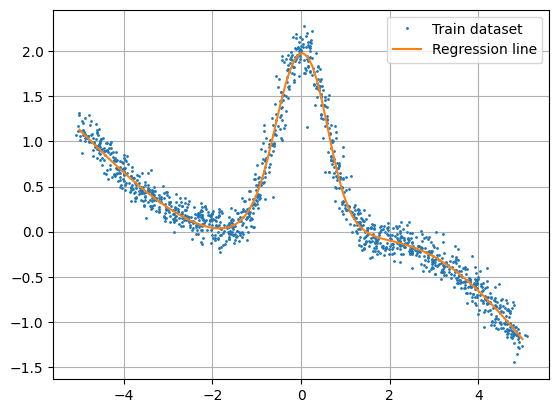

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import matplotlib.pyplot as plt

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

xs = np.linspace(-5,5,2000)
ys = []
for idx,x in enumerate(xs):
    xs[idx] = x+0.1*np.random.normal()
    y_value = -0.01*x**3+2*np.cos(x)*np.exp(-x**2)+0.1*np.random.normal()
    ys.append(y_value)
ys = np.array(ys)

test_idx = np.random.randint(0,len(xs),int(0.2*len(xs)))
x_test = xs[test_idx]
y_test = ys[test_idx]

mask = np.ones(len(xs),dtype=bool)
mask[test_idx] = False
xs = xs[mask,...]
ys = ys[mask,...]

validation_idx =  np.random.randint(0,len(xs),int(0.2*len(xs)))
x_valid = xs[validation_idx]
y_valid = ys[validation_idx]

mask = np.ones(len(xs),dtype=bool)
mask[validation_idx]=False
x_train = xs[mask,...]
y_train = ys[mask,...]

class MyDataset(Dataset):
    def __init__(self,x,y):
        self.x = torch.Tensor(x).to(device).view(-1,1)
        self.y = torch.Tensor(y).to(device).view(-1,1)

    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]

    def __len__(self):
        return len(self.x)

x_min,x_max = x_train.min(),x_train.max()
y_min,y_max = y_train.min(),y_train.max()

def normalization(x,y):
    x = (x-x_min)/(x_max-x_min)
    y = (y-y_min)/(y_max-y_min)
    return x,y

def unnormalization(x,y):
    x = x*(x_max-x_min)+x_min
    y = y*(y_max-y_min)+y_min
    return x,y

x_train,y_train = normalization(x_train,y_train)
x_valid,y_valid = normalization(x_valid,y_valid)

train_dataset = MyDataset(x_train,y_train)
valid_dataset = MyDataset(x_valid,y_valid)

train_dataloader = DataLoader(train_dataset,batch_size=32,shuffle=True)
valid_dataloader = DataLoader(valid_dataset,batch_size=32,shuffle=False)

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel,self).__init__()
        self.lin1 = nn.Linear(1,32)
        self.lin2 = nn.Linear(32,32)
        self.lin3 = nn.Linear(32,32)
        self.lin4 = nn.Linear(32,1)

    def forward(self,x):
        x = torch.tanh(self.lin1(x))
        x = torch.tanh(self.lin2(x))
        x = torch.tanh(self.lin3(x))
        x = self.lin4(x)
        return x

model = MyModel().to(device)
optimizer = optim.Adam(model.parameters(),lr=1e-04,weight_decay=1e-12)
criterion = nn.MSELoss()

#train
for epoch in range(2000):
    train_loss, valid_loss = 0, 0
    cnt_train, cnt_valid = 0, 0
    for x,y in train_dataloader:
        y_infer = model(x)
        loss = criterion(y_infer,y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        cnt_train += 1
    with torch.no_grad():
        for x,y in valid_dataloader:
            y_infer = model(x)
            loss = criterion(y_infer,y)
            valid_loss += loss.item()
            cnt_valid += 1
    if epoch % 100 == 0:
        print(f'{epoch} Epoch train information')
        print(f'Loss: {train_loss/cnt_train:.4f}(Train_data),{valid_loss/cnt_valid:.4f}(Validation_data)')

x_train,y_train = unnormalization(x_train,y_train)
x_test,y_test = normalization(x_test,y_test)
x_test_torch = torch.Tensor(x_test).view(-1,1)
y_test_torch = torch.Tensor(y_test).view(-1,1)
y_test_infer = model(x_test_torch)
loss = criterion(y_test_infer,y_test_torch).item()
print(f'test dataset L2_error: {loss}')

x_infer = torch.linspace(-5,5,100).view(-1,1)
# x -> normalization
x_infer = (x_infer-x_train.min())/(x_train.max()-x_train.min())
y_infer = model(x_infer)
x_infer = x_infer.detach().cpu().numpy().reshape(-1,)
y_infer = y_infer.detach().cpu().numpy().reshape(-1,)
x_infer,y_infer = unnormalization(x_infer,y_infer)

plt.plot(x_train,y_train,'o',markersize=1,label='Train dataset')
plt.plot(x_infer,y_infer,'-',markersize=1,label='Regression line')
plt.grid()
plt.legend()

In [27]:
import tensorflow as tf
import numpy as np

sentence = ("if you want to build a ship, don't drum up people together to "
            "collect wood and don't assign them tasks and work, but rather "
            "teach them to long for the endless immensity of the sea.")

char_set = list(set(sentence))
char_dic = {w: i for i, w in enumerate(char_set)}

data_dim = len(char_set)
hidden_size = len(char_set)
num_classes = len(char_set)
sequence_length = 20
learning_rate = 0.01

dataX = []
dataY = []
for i in range(0, len(sentence) - sequence_length):
    x_str = sentence[i:i + sequence_length]
    y_str = sentence[i + 1: i + sequence_length + 1]

    x = [char_dic[c] for c in x_str]
    y = [char_dic[c] for c in y_str]

    dataX.append(x)
    dataY.append(y)

batch_size = len(dataX)

X_one_hot = tf.one_hot(dataX, num_classes)
Y_one_hot = tf.one_hot(dataY, num_classes)

model = tf.keras.Sequential()
model.add(tf.keras.layers.
             LSTM(units=num_classes, input_shape=(sequence_length, X_one_hot.shape[2]), return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes, activation='softmax')))
# TimeDistributed()는 '' to many에만 적용!
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                 metrics=['accuracy'])
model.fit(X_one_hot, Y_one_hot, epochs=100)

results = model.predict(X_one_hot)
for j, result in enumerate(results):
    index = np.argmax(result, axis=1)
    if j == 0:
        print(''.join([char_set[t] for t in index]), end='')
    else:
        print(char_set[index[-1]], end='')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 20, 25)            5100      
                                                                 
 time_distributed_4 (TimeDi  (None, 20, 25)            650       
 stributed)                                                      
                                                                 
Total params: 5750 (22.46 KB)
Trainable params: 5750 (22.46 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 3s 12ms/step - loss: 3.1569 - accuracy: 0.1312
Epoch 2/100
5/5 [==============================] - 0s 12ms/step - loss: 2.9477 - accuracy: 0.1881
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 2.8174 - accuracy: 0.1934
Epoch 4/100
5/5 [==============================] - 0s 15

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

actions = np.arange(-5,5+1)
states = []
for i in range(20+1):
    for j in range(20+1):
        states.append([i,j])
value = np.zeros((20+1,20+1))
new_value = np.zeros((20+1,20+1))

policy = np.zeros((20+1, 20+1))
new_policy = np.zeros((20+1,20+1))

p_dict = {}

def poisson_distribution(x,lamb):
    global p_dict
    key = (x,lamb)
    if key not in p_dict.keys():
        p_dict[key] = lamb**x*np.exp(-lamb)/np.math.factorial(x)
    return p_dict[key]

poisson_upper_bound = 8+1

def Calculate_nextV_function(state,action,state_value,gamma=0.9):
    returns = -2*np.abs(action)

    A_cars = int(max(min(state[0]-action,20),0))
    B_cars = int(max(min(state[1]+action,20),0))

    for rentA in range(poisson_upper_bound):
        for rentB in range(poisson_upper_bound):
            for returnA in range(poisson_upper_bound):
                for returnB in range(poisson_upper_bound):
                    rent_prob = poisson_distribution(rentA,3)*poisson_distribution(rentB,4)

                    Alot_rent_fin = min(A_cars,rentA)
                    Blot_rent_fin = min(B_cars,rentB)
                    reward = (Alot_rent_fin+Blot_rent_fin)*10

                    return_prob = poisson_distribution(returnA,3)*poisson_distribution(returnB,2)

                    next_A_cars = int(max(min(A_cars-Alot_rent_fin*returnA,20),0))
                    next_B_cars = int(max(min(B_cars+Blot_rent_fin*returnB,20),0))

                    total_prob = rent_prob*return_prob

                    returns += total_prob*(reward+gamma*state_value[next_A_cars,next_B_cars])
    return returns

iter_policy = []
iter_value = []
iter_policy.append(policy)
iter_value.append(value)

it = 0
while True:
    print(f'Repeat num: {it+1}')
    for i,j in states:
        action_buffer = []
        for action in actions:
            if ((i>=action and action >= 0) or (action < 0 and j >= np.abs(action))):
                action_buffer.append(Calculate_nextV_function([i,j],action,value))
            else:
                action_buffer.append(-np.inf)
                
            act_idx = np.argmax(action_buffer)
            new_policy[i,j] = actions[act_idx]
            
            new_value[i,j] = Calculate_nextV_function([i,j],actions[act_idx],value)

    it += 1
    if np.sum(policy!=new_policy) < 1e-04:
        break
    value = new_value.copy()
    policy = new_policy.copy()

    iter_policy.append(policy)
    iter_value.append(value)

# fig,ax = plt.subplots()
# cs = ax.contour(policy,colors='k')
# ax.clabel(cs,inline=1,fontsize=10)
# ax.set_title("Policy")